In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
os.listdir('./inputs/')

['feature_explain.xlsx', 'sample_submit.txt', 'test_a.xlsx', 'train.xlsx']

In [23]:
train = pd.read_excel('inputs/train.xlsx')
test =  pd.read_excel('inputs/test_a.xlsx')
submission = pd.read_fwf('inputs/sample_submit.txt')
print(train.shape, test.shape, submission.shape)

(40000, 51) (12000, 50) (5, 2)


In [24]:
submission.head()

,CUST_UID,PR
0,9f37501d2dc7407b8fcfad91426e3b0e,0.912431
1,81782d53d2534448ab14e42df878dde8,0.271181
2,f8970fdae92e4ddd8719b58e05bf66a8,0.656388
3,63928c02877a4136855cd8af0ba510f1,0.961668
4,fd1c050e031b4451b5f530a7cd788d92,0.932660


In [25]:
train.head()

,CUST_UID,LABEL,AGN_CNT_RCT_12_MON,ICO_CUR_MON_ACM_TRX_TM,NB_RCT_3_MON_LGN_TMS_AGV,AGN_CUR_YEAR_AMT,AGN_CUR_YEAR_WAG_AMT,AGN_AGR_LATEST_AGN_AMT,ICO_CUR_MON_ACM_TRX_AMT,COUNTER_CUR_YEAR_CNT_AMT,...,WTHR_OPN_ONL_ICO,EMP_NBR,REG_CPT,SHH_BCK,HLD_DMS_CCY_ACT_NBR,REG_DT,LGP_HLD_CARD_LVL,OPN_TM,NB_CTC_HLD_IDV_AIO_CARD_SITU,HLD_FGN_CCY_ACT_NBR
0,2a171d461bf24a739b804c2843ad4f6e,0,NaN,72.0,425.3,NaN,NaN,NaN,25879985.3,2.0,...,B,2.0,1.200000e+09,32.0,12.0,1708.45,NaN,416.84,NaN,2.0
1,c58d5848d18548e297963c2d9e092699,0,2282.0,222.0,NaN,11776572.4,NaN,1964626.4,14755499.8,2.0,...,B,1002.0,5.000002e+06,32.0,22.0,199.42,F,195.87,D,2.0
2,74e6d8179e784a039bcb5a722014f4a4,0,NaN,2.0,NaN,NaN,NaN,4599822.3,2.0,2.0,...,B,2.0,NaN,2.0,12.0,1135.55,F,1122.00,NaN,2.0
3,1b6a8be2c2e34de09ca00d71470ec180,1,NaN,NaN,22.0,NaN,NaN,NaN,NaN,2.0,...,A,2.0,5.000020e+05,12.0,12.0,98.45,NaN,92.00,C,2.0
4,1974b5e0440a41128a416a8cdc8a7c16,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,2.0,NaN,2.0,12.0,NaN,NaN,355.87,C,2.0


In [26]:
test.head()

,CUST_UID,AGN_CNT_RCT_12_MON,ICO_CUR_MON_ACM_TRX_TM,NB_RCT_3_MON_LGN_TMS_AGV,AGN_CUR_YEAR_AMT,AGN_CUR_YEAR_WAG_AMT,AGN_AGR_LATEST_AGN_AMT,ICO_CUR_MON_ACM_TRX_AMT,COUNTER_CUR_YEAR_CNT_AMT,PUB_TO_PRV_TRX_AMT_CUR_YEAR,...,WTHR_OPN_ONL_ICO,EMP_NBR,REG_CPT,SHH_BCK,HLD_DMS_CCY_ACT_NBR,REG_DT,LGP_HLD_CARD_LVL,OPN_TM,NB_CTC_HLD_IDV_AIO_CARD_SITU,HLD_FGN_CCY_ACT_NBR
0,deca9c4409e84344bc4059116902ba0e,23662.0,NaN,NaN,NaN,NaN,135692.0,NaN,2.0,2.0,...,NaN,26622.0,NaN,2.0,12.0,242461.35,NaN,1588.13,NaN,2.0
1,25377f79cf9d4964a2f9893dc572caba,NaN,2.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,...,B,1502.0,3.800000e+08,32.0,12.0,432.00,NaN,82.65,NaN,2.0
2,66979a1614fb49f1bcdcdce75d6abefc,1672.0,2.0,48.7,992125.6,NaN,992125.6,2.0,2.0,2.0,...,A,2.0,NaN,2.0,42.0,NaN,NaN,512.65,C,22.0
3,84142dedb7e0442eb9aa7aeadf93f66e,5432.0,102.0,88.7,46729796.3,46729796.3,7356752.4,8048976.0,2.0,2154106.4,...,B,432.0,5.000002e+06,12.0,12.0,442.00,C,432.00,C,2.0
4,5e5817f15c8d4bdebefa820961854ac2,11842.0,782.0,1545.3,27085791.9,NaN,135002.0,81516420.9,2.0,2421499.6,...,B,902.0,1.131689e+09,32.0,12.0,3747.48,NaN,3200.06,C,2.0


In [27]:
df = pd.read_excel('inputs/feature_explain.xlsx', sheet_name='train', skiprows=2)
index_num = 0
index_category = 0
for va in df.values:
    print('Column:', va[0], ' Description:', va[1])

Column: AGN_CNT_RCT_12_MON  Description: Numerical
Column: ICO_CUR_MON_ACM_TRX_TM  Description: Numerical
Column: NB_RCT_3_MON_LGN_TMS_AGV  Description: Numerical
Column: AGN_CUR_YEAR_AMT  Description: Numerical
Column: AGN_CUR_YEAR_WAG_AMT  Description: Numerical
Column: AGN_AGR_LATEST_AGN_AMT  Description: Numerical
Column: ICO_CUR_MON_ACM_TRX_AMT  Description: Numerical
Column: COUNTER_CUR_YEAR_CNT_AMT  Description: Numerical
Column: PUB_TO_PRV_TRX_AMT_CUR_YEAR  Description: Numerical
Column: MON_12_EXT_SAM_TRSF_IN_AMT  Description: Numerical
Column: MON_12_EXT_SAM_TRSF_OUT_AMT  Description: Numerical
Column: MON_12_EXT_SAM_NM_TRSF_OUT_CNT  Description: Numerical
Column: MON_12_EXT_SAM_AMT  Description: Numerical
Column: CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT  Description: Numerical
Column: CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT  Description: Numerical
Column: MON_12_CUST_CNT_PTY_ID  Description: Categorical
Column: MON_12_TRX_AMT_MAX_AMT_PCTT  Description: Numerical
Column: CUR_YEAR_MON_AGV_T

In [28]:
index_num = 0
index_category = 0
for va in df.values:
    if va[1]=='Categorical':
        train=train.rename(columns={va[0]:va[1]+"_"+str(index_category)})
        test=test.rename(columns={va[0]:va[1]+"_"+str(index_category)})
        index_category+=1
    else:
        train=train.rename(columns={va[0]:va[1]+"_"+str(index_num)})
        test=test.rename(columns={va[0]:va[1]+"_"+str(index_num)})
        index_num+=1
        print(str(va[0])+"  "+str(index_num-1))
train.head()

AGN_CNT_RCT_12_MON  0
ICO_CUR_MON_ACM_TRX_TM  1
NB_RCT_3_MON_LGN_TMS_AGV  2
AGN_CUR_YEAR_AMT  3
AGN_CUR_YEAR_WAG_AMT  4
AGN_AGR_LATEST_AGN_AMT  5
ICO_CUR_MON_ACM_TRX_AMT  6
COUNTER_CUR_YEAR_CNT_AMT  7
PUB_TO_PRV_TRX_AMT_CUR_YEAR  8
MON_12_EXT_SAM_TRSF_IN_AMT  9
MON_12_EXT_SAM_TRSF_OUT_AMT  10
MON_12_EXT_SAM_NM_TRSF_OUT_CNT  11
MON_12_EXT_SAM_AMT  12
CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT  13
CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT  14
MON_12_TRX_AMT_MAX_AMT_PCTT  15
CUR_YEAR_MON_AGV_TRX_CNT  16
MON_12_AGV_TRX_CNT  17
MON_12_ACM_ENTR_ACT_CNT  18
MON_12_AGV_ENTR_ACT_CNT  19
MON_12_ACM_LVE_ACT_CNT  20
MON_12_AGV_LVE_ACT_CNT  21
CUR_YEAR_PUB_TO_PRV_TRX_PTY_CNT  22
MON_6_50_UP_ENTR_ACT_CNT  23
MON_6_50_UP_LVE_ACT_CNT  24
CUR_YEAR_COUNTER_ENCASH_CNT  25
MON_12_ACT_OUT_50_UP_CNT_PTY_QTY  26
MON_12_ACT_IN_50_UP_CNT_PTY_QTY  27
LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL  28
LAST_12_MON_COR_DPS_DAY_AVG_BAL  29
CUR_MON_COR_DPS_MON_DAY_AVG_BAL  30
CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL  31
CUR_YEAR_COR_DPS_YEAR_DAY_A

,CUST_UID,LABEL,Numerical_0,Numerical_1,Numerical_2,Numerical_3,Numerical_4,Numerical_5,Numerical_6,Numerical_7,...,Categorical_2,Numerical_37,Numerical_38,Categorical_3,Numerical_39,Numerical_40,Categorical_4,Numerical_41,Categorical_5,Numerical_42
0,2a171d461bf24a739b804c2843ad4f6e,0,NaN,72.0,425.3,NaN,NaN,NaN,25879985.3,2.0,...,B,2.0,1.200000e+09,32.0,12.0,1708.45,NaN,416.84,NaN,2.0
1,c58d5848d18548e297963c2d9e092699,0,2282.0,222.0,NaN,11776572.4,NaN,1964626.4,14755499.8,2.0,...,B,1002.0,5.000002e+06,32.0,22.0,199.42,F,195.87,D,2.0
2,74e6d8179e784a039bcb5a722014f4a4,0,NaN,2.0,NaN,NaN,NaN,4599822.3,2.0,2.0,...,B,2.0,NaN,2.0,12.0,1135.55,F,1122.00,NaN,2.0
3,1b6a8be2c2e34de09ca00d71470ec180,1,NaN,NaN,22.0,NaN,NaN,NaN,NaN,2.0,...,A,2.0,5.000020e+05,12.0,12.0,98.45,NaN,92.00,C,2.0
4,1974b5e0440a41128a416a8cdc8a7c16,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,2.0,NaN,2.0,12.0,NaN,NaN,355.87,C,2.0


In [29]:
# 把category和numerical 分开放
train=train[['CUST_UID','LABEL','Categorical_0','Categorical_1','Categorical_2','Categorical_3','Categorical_4','Categorical_5','Numerical_0','Numerical_1','Numerical_2','Numerical_3','Numerical_4','Numerical_5','Numerical_6','Numerical_7','Numerical_8','Numerical_9','Numerical_10','Numerical_11','Numerical_12','Numerical_13','Numerical_14','Numerical_15','Numerical_16','Numerical_17','Numerical_18','Numerical_19','Numerical_20','Numerical_21','Numerical_22','Numerical_23','Numerical_24','Numerical_25','Numerical_26','Numerical_27','Numerical_28','Numerical_29','Numerical_30','Numerical_31','Numerical_32','Numerical_33','Numerical_34','Numerical_35','Numerical_36','Numerical_37','Numerical_38','Numerical_39','Numerical_40','Numerical_41','Numerical_42']]
test=test[['CUST_UID','Categorical_0','Categorical_1','Categorical_2','Categorical_3','Categorical_4','Categorical_5','Numerical_0','Numerical_1','Numerical_2','Numerical_3','Numerical_4','Numerical_5','Numerical_6','Numerical_7','Numerical_8','Numerical_9','Numerical_10','Numerical_11','Numerical_12','Numerical_13','Numerical_14','Numerical_15','Numerical_16','Numerical_17','Numerical_18','Numerical_19','Numerical_20','Numerical_21','Numerical_22','Numerical_23','Numerical_24','Numerical_25','Numerical_26','Numerical_27','Numerical_28','Numerical_29','Numerical_30','Numerical_31','Numerical_32','Numerical_33','Numerical_34','Numerical_35','Numerical_36','Numerical_37','Numerical_38','Numerical_39','Numerical_40','Numerical_41','Numerical_42']]

In [30]:
assert train['CUST_UID'].nunique() == train['CUST_UID'].shape[0]
assert test['CUST_UID'].nunique() == test['CUST_UID'].shape[0]
assert test['CUST_UID'].nunique()+ train['CUST_UID'].nunique()  == len(set(test['CUST_UID'].values.tolist()+ \
                                                                         train['CUST_UID'].values.tolist()))

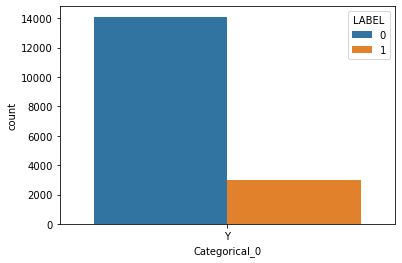

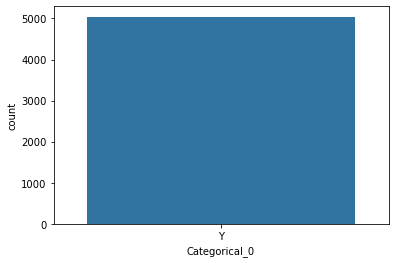

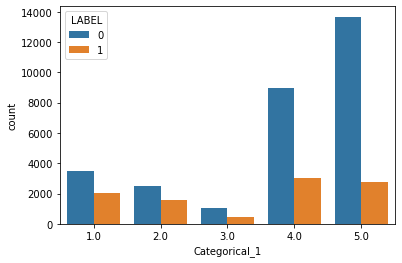

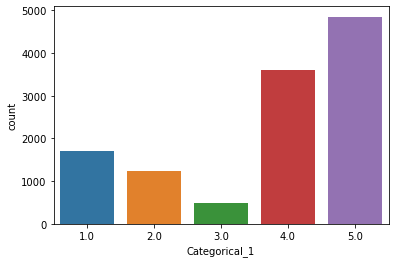

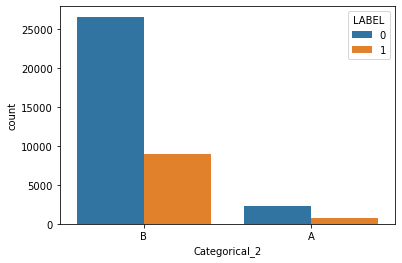

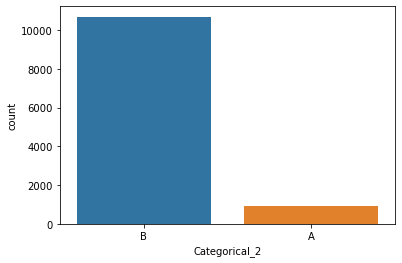

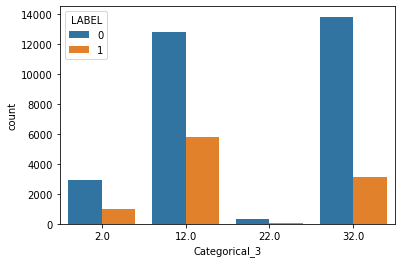

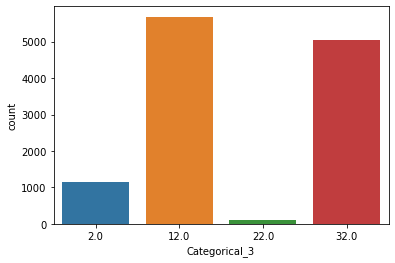

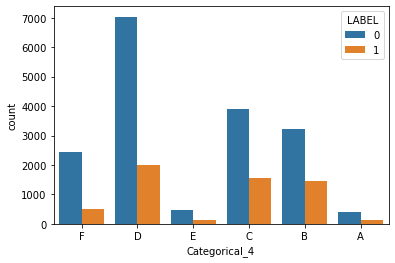

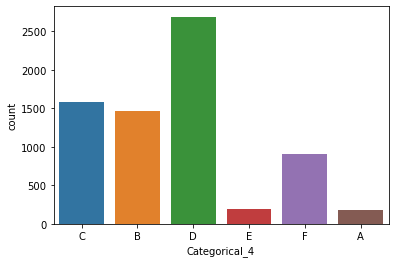

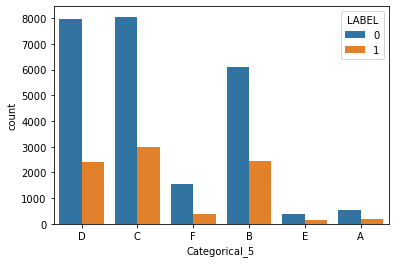

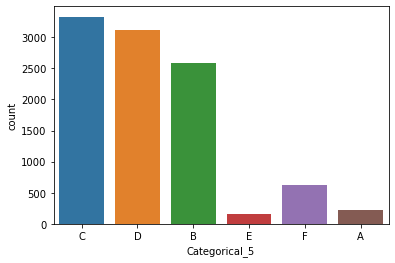

In [33]:
# 再画个图
# train_count=train.shape[0]
# test_count=test.shape[0]
for i in range(6):
    s="Categorical_"+str(i)
    sns.countplot(x = s, hue = "LABEL", data = train)
    plt.show()
    sns.countplot(x = s, data = test)
    plt.show()

In [34]:
#缺失值处理
train.loc[train['Categorical_0'].isnull(),'Categorical_0']='F'
train.loc[train['Categorical_1'].isnull(),'Categorical_1']=5.0
train.loc[train['Categorical_2'].isnull(),'Categorical_2']="B"
train.loc[train['Categorical_3'].isnull(),'Categorical_3']=12.0
train.loc[train['Categorical_4'].isnull(),'Categorical_4']="f"
train.loc[train['Categorical_5'].isnull(),'Categorical_5']="f"

test.loc[test['Categorical_0'].isnull(),'Categorical_0']='F'
test.loc[test['Categorical_1'].isnull(),'Categorical_1']=5.0
test.loc[test['Categorical_2'].isnull(),'Categorical_2']="B"
test.loc[test['Categorical_3'].isnull(),'Categorical_3']=12.0
test.loc[test['Categorical_4'].isnull(),'Categorical_4']="f"
test.loc[test['Categorical_5'].isnull(),'Categorical_5']="f"

In [35]:
train.isnull().sum()
for i in range(43):
    feature = "Numerical_"+str(i)
    train.loc[train[feature].isnull(),feature]=train[feature].median()
    test.loc[test[feature].isnull(),feature]=test[feature].median()
test.isnull().sum()

CUST_UID         0
Categorical_0    0
Categorical_1    0
Categorical_2    0
Categorical_3    0
Categorical_4    0
Categorical_5    0
Numerical_0      0
Numerical_1      0
Numerical_2      0
Numerical_3      0
Numerical_4      0
Numerical_5      0
Numerical_6      0
Numerical_7      0
Numerical_8      0
Numerical_9      0
Numerical_10     0
Numerical_11     0
Numerical_12     0
Numerical_13     0
Numerical_14     0
Numerical_15     0
Numerical_16     0
Numerical_17     0
Numerical_18     0
Numerical_19     0
Numerical_20     0
Numerical_21     0
Numerical_22     0
Numerical_23     0
Numerical_24     0
Numerical_25     0
Numerical_26     0
Numerical_27     0
Numerical_28     0
Numerical_29     0
Numerical_30     0
Numerical_31     0
Numerical_32     0
Numerical_33     0
Numerical_34     0
Numerical_35     0
Numerical_36     0
Numerical_37     0
Numerical_38     0
Numerical_39     0
Numerical_40     0
Numerical_41     0
Numerical_42     0
dtype: int64

In [38]:
train.to_csv("./preprocesses/train_clean.csv",index=False)
test.to_csv("./preprocesses/test_clean.csv",index=False)

In [39]:
train=pd.read_csv("./preprocesses/train_clean.csv")
test=pd.read_csv("./preprocesses/test_clean.csv")

In [40]:
train.head()

,CUST_UID,LABEL,Categorical_0,Categorical_1,Categorical_2,Categorical_3,Categorical_4,Categorical_5,Numerical_0,Numerical_1,...,Numerical_33,Numerical_34,Numerical_35,Numerical_36,Numerical_37,Numerical_38,Numerical_39,Numerical_40,Numerical_41,Numerical_42
0,2a171d461bf24a739b804c2843ad4f6e,0,F,5.0,B,32.0,f,f,2472.0,72.0,...,137056286.2,191980912.7,22.0,11559.9,2.0,1.200000e+09,12.0,1708.45,416.84,2.0
1,c58d5848d18548e297963c2d9e092699,0,Y,5.0,B,32.0,F,D,2282.0,222.0,...,62611958.7,74162776.4,72.0,4119.8,1002.0,5.000002e+06,22.0,199.42,195.87,2.0
2,74e6d8179e784a039bcb5a722014f4a4,0,F,5.0,B,2.0,F,f,2472.0,2.0,...,14013310.2,14013310.2,32.0,2376.9,2.0,1.000000e+08,12.0,1135.55,1122.00,2.0
3,1b6a8be2c2e34de09ca00d71470ec180,1,F,1.0,A,12.0,f,C,2472.0,92.0,...,7359193.5,7359193.5,22.0,3468.2,2.0,5.000020e+05,12.0,98.45,92.00,2.0
4,1974b5e0440a41128a416a8cdc8a7c16,1,Y,4.0,A,2.0,f,C,2472.0,92.0,...,26546188.1,37887572.4,12.0,2.0,2.0,1.000000e+08,12.0,702.97,355.87,2.0


In [41]:
train[['LABEL']] = train[['LABEL']].astype('float64')
train[['Categorical_1','Categorical_3']]=train[['Categorical_1','Categorical_3']].astype('object')
test[['Categorical_1','Categorical_3']]=test[['Categorical_1','Categorical_3']].astype('object')

In [42]:
uid_train=train['CUST_UID']
uid_test=test['CUST_UID']

In [43]:
train.drop(columns=['CUST_UID'],inplace=True)
test.drop(columns=['CUST_UID'],inplace=True)

In [44]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [45]:
train['CUST_UID']=uid_train
test['CUST_UID']=uid_test

In [46]:
train.to_csv("./preprocesses/train_clean_encode.csv",index=False)
test.to_csv("./preprocesses/test_clean_encode.csv",index=False)

In [47]:
train.shape

(40000, 72)

In [48]:
train

,LABEL,Numerical_0,Numerical_1,Numerical_2,Numerical_3,Numerical_4,Numerical_5,Numerical_6,Numerical_7,Numerical_8,...,Categorical_4_F,Categorical_4_f,Categorical_5_A,Categorical_5_B,Categorical_5_C,Categorical_5_D,Categorical_5_E,Categorical_5_F,Categorical_5_f,CUST_UID
0,0.0,2472.0,72.0,425.3,12015888.3,8816593.9,674873.7,25879985.3,2.0,660732.0,...,0,1,0,0,0,0,0,0,1,2a171d461bf24a739b804c2843ad4f6e
1,0.0,2282.0,222.0,175.3,11776572.4,8816593.9,1964626.4,14755499.8,2.0,126608.3,...,1,0,0,0,0,1,0,0,0,c58d5848d18548e297963c2d9e092699
2,0.0,2472.0,2.0,175.3,12015888.3,8816593.9,4599822.3,2.0,2.0,2.0,...,1,0,0,0,0,0,0,0,1,74e6d8179e784a039bcb5a722014f4a4
3,1.0,2472.0,92.0,22.0,12015888.3,8816593.9,674873.7,9622952.0,2.0,2.0,...,0,1,0,0,1,0,0,0,0,1b6a8be2c2e34de09ca00d71470ec180
4,1.0,2472.0,92.0,175.3,12015888.3,8816593.9,674873.7,9622952.0,2.0,2802.0,...,0,1,0,0,1,0,0,0,0,1974b5e0440a41128a416a8cdc8a7c16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,2472.0,2.0,55.3,12015888.3,8816593.9,674873.7,2.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,ca299adfc4be4af0b11c85abf28a12e6
39996,0.0,2472.0,72.0,145.3,12015888.3,8816593.9,674873.7,16431457.9,2.0,2.0,...,0,1,0,0,0,0,0,0,1,c13f097515ee47ca962526482ab500fb
39997,0.0,21532.0,1132.0,175.3,81027170.3,8816593.9,12772212.7,596254539.9,2.0,484869.1,...,0,0,0,0,0,0,0,0,1,b8ec8daa79234cd1aceed066bf78f069
39998,1.0,2472.0,12.0,128.7,12015888.3,8816593.9,674873.7,488502.0,2.0,2.0,...,0,1,0,0,0,0,0,0,1,1a538dd9745249b7b9d1f52b6edb80ba


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CUST_UID       40000 non-null  object 
 1   LABEL          40000 non-null  int64  
 2   Categorical_0  40000 non-null  object 
 3   Categorical_1  40000 non-null  float64
 4   Categorical_2  40000 non-null  object 
 5   Categorical_3  40000 non-null  float64
 6   Categorical_4  40000 non-null  object 
 7   Categorical_5  40000 non-null  object 
 8   Numerical_0    40000 non-null  float64
 9   Numerical_1    40000 non-null  float64
 10  Numerical_2    40000 non-null  float64
 11  Numerical_3    40000 non-null  float64
 12  Numerical_4    40000 non-null  float64
 13  Numerical_5    40000 non-null  float64
 14  Numerical_6    40000 non-null  float64
 15  Numerical_7    40000 non-null  float64
 16  Numerical_8    40000 non-null  float64
 17  Numerical_9    40000 non-null  float64
 18  Numeri